In [13]:
library(dplyr)
library(imager)
library(pracma)

In [10]:
# Define a function to show face images ####
showImage <- function(x) {
  x %>%
  apply(2, rev) %>% #Rotate matrix by 90 degrees, step one : reverse columns 
  t %>% # Rotate matrix by 90 degrees, step two: transpose matrix
  image(xaxt="n", yaxt="n") # 256 diffrent intensities between 0 and 1 defined
}

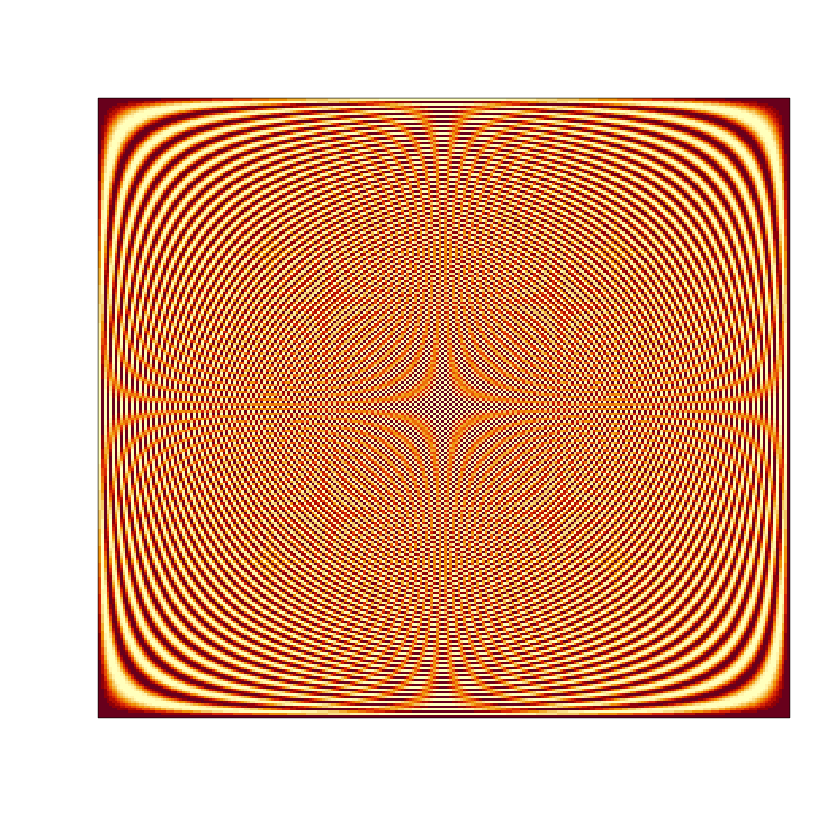

In [23]:
n <- 256
w <- exp(-1i * 2 * pi / n)

DFT <- matrix( rep(0, n*n), nrow=n, ncol=n )

# Slow
for (i in 1:n){
    for (k in 1:n) {
        DFT[i,k] = w^(i*k)
    }
}

DFT = Re(DFT)
showImage(DFT)

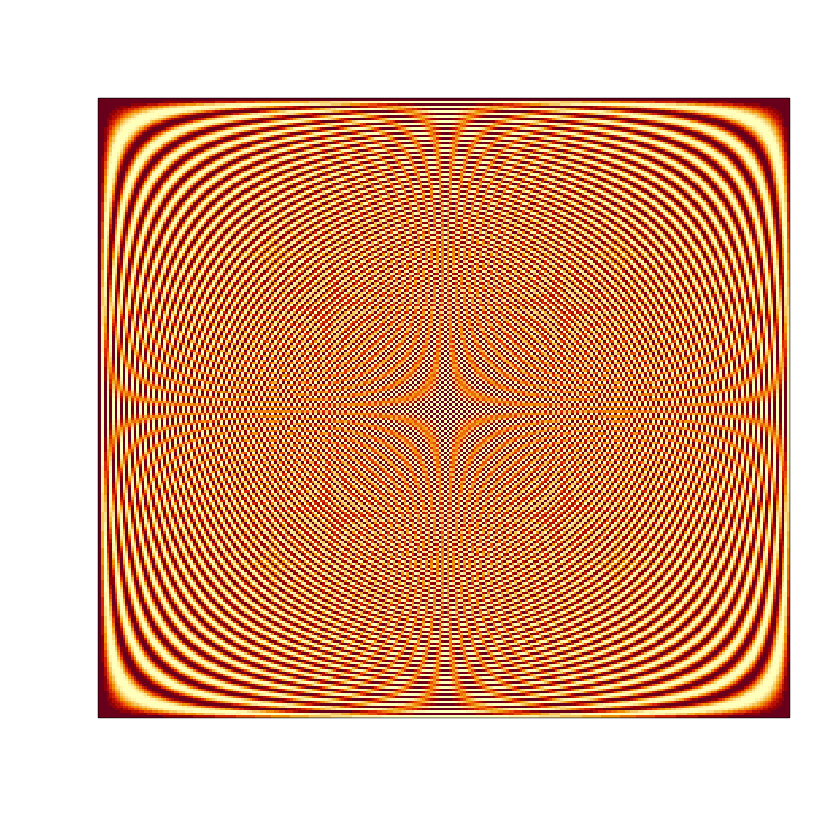

In [25]:
# Fast
DFT <- outer(0:(n-1), 0:(n-1), function(i, j) w^(i*j)) / sqrt(n)

DFT = Re(DFT)
showImage(DFT)